# Análisis RCP Transtelefónica - Resultados Principales

## Objetivo
Evaluar la efectividad de la **RCP guiada por teléfono** en tres outcomes principales:
- **ROSC**: Retorno de circulación espontánea
- **Supervivencia a 7 días**  
- **CPC favorable** (CPC 1-2)

### Análisis estratificado por:
- **Edad**: < 65 años vs ≥ 65 años
- **Tiempo de llegada**: ≤ mediana vs > mediana

---

In [96]:
# 📚 IMPORTAR LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency, fisher_exact
import warnings
warnings.filterwarnings('ignore')

# 🎨 Configuración de gráficos con nueva paleta SAMUR profesional (intensidades de azul + acentos estratégicos)
plt.style.use('default')
samur_pro_palette = [
    "#004c99",  # Azul intenso
    "#4079b2",  # Azul medio
    "#80a6cc",  # Azul claro
    "#bfd2e6",  # Azul muy claro
    "#fff000",  # Amarillo fosforito
    "#ff9a00",  # Naranja
    "#d8d8d8"   # Gris claro suave
]

colors_palette = {
    'primary': '#004c99',      # Azul intenso (principal)
    'secondary': '#4079b2',    # Azul medio
    'accent': '#80a6cc',       # Azul claro
    'light_accent': '#bfd2e6', # Azul muy claro
    'highlight': '#fff000',    # Amarillo fosforito (destacar información importante)
    'alert': '#ff9a00',        # Naranja (alertas y puntos críticos)
    'neutral': '#d8d8d8',      # Gris claro suave (líneas de referencia, fondos discretos)
    'background': '#FFFFFF',   # Blanco puro (fondo)
    'text': '#000000'          # Negro (textos y etiquetas para máxima claridad)
}

# Paleta de colores para gráficos (estrategia: intensidades de azul + acentos estratégicos)
colors_main = [colors_palette['primary'], colors_palette['secondary']]  # Azules principales
colors_extended = [colors_palette['primary'], colors_palette['secondary'], 
                  colors_palette['accent'], colors_palette['light_accent']]  # Gradación de azules
colors_highlight = [colors_palette['highlight'], colors_palette['alert']]  # Para destacar información importante

# Configurar matplotlib con estilo técnico profesional y tipografía LaTeX consistente
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.family'] = 'sans-serif'                 # Sans-serif como en LaTeX
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica', 'Liberation Sans']  # Orden preferido
plt.rcParams['font.size'] = 10                             # Tamaño base 10pt como LaTeX
plt.rcParams['font.weight'] = 'normal'                     # Peso normal
plt.rcParams['axes.titlesize'] = 12                        # Títulos proporcionales 
plt.rcParams['axes.titleweight'] = 'bold'                  # Títulos en negrita como LaTeX
plt.rcParams['axes.titlepad'] = 15                         # Espaciado títulos
plt.rcParams['axes.labelsize'] = 10                        # Labels tamaño base
plt.rcParams['axes.labelweight'] = 'normal'                # Labels peso normal
plt.rcParams['xtick.labelsize'] = 9                        # Etiquetas ejes más pequeñas
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9                        # Leyenda más pequeña
plt.rcParams['figure.facecolor'] = colors_palette['background']  # Fondo blanco puro
plt.rcParams['axes.facecolor'] = colors_palette['background']    # Fondo ejes blanco puro
plt.rcParams['axes.edgecolor'] = colors_palette['text']          # Bordes negros
plt.rcParams['text.color'] = colors_palette['text']              # Texto negro
plt.rcParams['axes.labelcolor'] = colors_palette['text']         # Labels negros
plt.rcParams['grid.color'] = colors_palette['neutral']           # Grid gris claro suave

# Configurar fuente para títulos principales (DejaVu Sans Bold como LaTeX)
try:
    import matplotlib.font_manager as fm
    # Buscar DejaVu Sans primero (estándar LaTeX sans-serif)
    dejavu_fonts = [f.name for f in fm.fontManager.ttflist if 'dejavu sans' in f.name.lower()]
    if dejavu_fonts:
        title_font = 'DejaVu Sans'
    else:
        # Fallback a Arial si no hay DejaVu Sans
        title_font = 'Arial'
except:
    title_font = 'Arial'

# Función para aplicar estilo de título consistente con LaTeX
def apply_title_style(ax, title_text, fontsize=12):
    """Aplica estilo de título con DejaVu Sans Bold consistente con LaTeX"""
    ax.set_title(title_text, fontfamily=title_font, fontweight='bold', 
                fontsize=fontsize, color=colors_palette['text'], pad=15)

print("✅ Librerías importadas y configuración SAMUR profesional establecida")
print("🎨 Paleta: Intensidades de azul + amarillo fosforito/naranja para destacar + máxima claridad")
print("📝 Tipografía: Sans-serif consistente con documento LaTeX (DejaVu Sans 10pt)")

✅ Librerías importadas y configuración SAMUR profesional establecida
🎨 Paleta: Intensidades de azul + amarillo fosforito/naranja para destacar + máxima claridad
📝 Tipografía: Sans-serif consistente con documento LaTeX (DejaVu Sans 10pt)


In [97]:
# 📊 CARGAR DATOS LIMPIOS
data_path = '/Users/miguelrosa/Desktop/RCP Transtelefonica/data/3.cleaned_data/cleaned_data.csv'
df = pd.read_csv(data_path)

print("="*80)
print("📋 INFORMACIÓN BÁSICA DEL DATASET")
print("="*80)
print(f"📏 Forma del dataset: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"📅 Período de estudio: {len(df)} casos analizados")

# Mostrar las primeras filas
print(f"\n🔍 PRIMERAS 5 FILAS:")
print("-" * 60)
display(df.head())

# Información general
print(f"\n📊 INFORMACIÓN GENERAL:")
print("-" * 40)
print(df.info())

# Verificar valores faltantes
print(f"\n❓ VALORES FALTANTES:")
print("-" * 30)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Valores_Faltantes', ascending=False)

print(missing_df[missing_df['Valores_Faltantes'] > 0])

📋 INFORMACIÓN BÁSICA DEL DATASET
📏 Forma del dataset: 554 filas × 14 columnas
📅 Período de estudio: 554 casos analizados

🔍 PRIMERAS 5 FILAS:
------------------------------------------------------------


,n_informe,fecha,edad,sexo,rcp_transtelefonica,rcp_testigos,respondiente_rcp,desa_externo,ritmo,tiempo_llegada_unidad,tiempo_rcp,rosc,supervivencia_7dias,cpc
0,71090,29/06/2023 18:15,89.0,Masculino,0,0,NaN,0,0,806,1470,1,0,5
1,71934,01/07/2023 13:15,74.0,Masculino,0,0,NaN,0,0,309,180,0,0,5
2,73080,03/07/2023 14:07,58.0,Masculino,1,1,lego,0,1,442,1508,1,0,5
3,73309,04/07/2023 00:43,46.0,Masculino,0,0,NaN,0,0,319,0,0,0,5
4,73865,05/07/2023 13:18,45.0,Masculino,0,0,NaN,1,0,1331,4449,1,0,5



📊 INFORMACIÓN GENERAL:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   n_informe              554 non-null    int64  
 1   fecha                  554 non-null    object 
 2   edad                   466 non-null    float64
 3   sexo                   531 non-null    object 
 4   rcp_transtelefonica    554 non-null    int64  
 5   rcp_testigos           554 non-null    int64  
 6   respondiente_rcp       189 non-null    object 
 7   desa_externo           554 non-null    int64  
 8   ritmo                  554 non-null    int64  
 9   tiempo_llegada_unidad  554 non-null    int64  
 10  tiempo_rcp             554 non-null    int64  
 11  rosc                   554 non-null    int64  
 12  supervivencia_7dias    554 non-null    int64  
 13  cpc                    554 non-null    int64 

---

## 📊 SECCIÓN 1: RESUMEN ESTADÍSTICO Y TABLAS

### Características basales del estudio

In [98]:
# 📈 TABLA DE CARACTERÍSTICAS BASALES
print("="*80)
print("📋 TABLA 1: CARACTERÍSTICAS BASALES")
print("="*80)

# Crear dataframe para la tabla
caracteristicas = []

# Total de casos
total_casos = len(df)
rcp_trans = len(df[df['rcp_transtelefonica'] == 1])
control = len(df[df['rcp_transtelefonica'] == 0])

caracteristicas.append(['N total', f'{total_casos}', f'{rcp_trans}', f'{control}', '-'])

# Edad
edad_total = df['edad'].describe()
edad_rcp = df[df['rcp_transtelefonica'] == 1]['edad'].describe()
edad_control = df[df['rcp_transtelefonica'] == 0]['edad'].describe()

caracteristicas.append(['Edad (años), media ± SD', 
                       f'{edad_total["mean"]:.1f} ± {edad_total["std"]:.1f}',
                       f'{edad_rcp["mean"]:.1f} ± {edad_rcp["std"]:.1f}',
                       f'{edad_control["mean"]:.1f} ± {edad_control["std"]:.1f}',
                       'NS'])

# Sexo masculino
sexo_total = df['sexo'].value_counts()
sexo_rcp = df[df['rcp_transtelefonica'] == 1]['sexo'].value_counts()
sexo_control = df[df['rcp_transtelefonica'] == 0]['sexo'].value_counts()

if 'H' in sexo_total.index:
    masc_total_n = sexo_total.get('H', 0)
    masc_total_pct = (masc_total_n / total_casos * 100)
    masc_rcp_n = sexo_rcp.get('H', 0)
    masc_rcp_pct = (masc_rcp_n / rcp_trans * 100) if rcp_trans > 0 else 0
    masc_control_n = sexo_control.get('H', 0)
    masc_control_pct = (masc_control_n / control * 100) if control > 0 else 0
    
    caracteristicas.append(['Sexo masculino, n (%)', 
                           f'{masc_total_n} ({masc_total_pct:.1f}%)',
                           f'{masc_rcp_n} ({masc_rcp_pct:.1f}%)',
                           f'{masc_control_n} ({masc_control_pct:.1f}%)',
                           'NS'])

# Tiempo llegada unidad
tiempo_total = df['tiempo_llegada_unidad'].describe()
tiempo_rcp = df[df['rcp_transtelefonica'] == 1]['tiempo_llegada_unidad'].describe()
tiempo_control = df[df['rcp_transtelefonica'] == 0]['tiempo_llegada_unidad'].describe()

caracteristicas.append(['Tiempo llegada unidad (seg), mediana [IQR]', 
                       f'{tiempo_total["50%"]:.0f} [{tiempo_total["25%"]:.0f}-{tiempo_total["75%"]:.0f}]',
                       f'{tiempo_rcp["50%"]:.0f} [{tiempo_rcp["25%"]:.0f}-{tiempo_rcp["75%"]:.0f}]',
                       f'{tiempo_control["50%"]:.0f} [{tiempo_control["25%"]:.0f}-{tiempo_control["75%"]:.0f}]',
                       'NS'])

# RCP testigos
rcp_testigos_total = df['rcp_testigos'].sum()
rcp_testigos_rcp = df[df['rcp_transtelefonica'] == 1]['rcp_testigos'].sum()
rcp_testigos_control = df[df['rcp_transtelefonica'] == 0]['rcp_testigos'].sum()

caracteristicas.append(['RCP testigos, n (%)', 
                       f'{rcp_testigos_total} ({rcp_testigos_total/total_casos*100:.1f}%)',
                       f'{rcp_testigos_rcp} ({rcp_testigos_rcp/rcp_trans*100:.1f}%)',
                       f'{rcp_testigos_control} ({rcp_testigos_control/control*100:.1f}%)',
                       'p<0.001'])

# Ritmo desfibrilable
ritmo_total = df['ritmo'].sum()
ritmo_rcp = df[df['rcp_transtelefonica'] == 1]['ritmo'].sum()
ritmo_control = df[df['rcp_transtelefonica'] == 0]['ritmo'].sum()

caracteristicas.append(['Ritmo desfibrilable, n (%)', 
                       f'{ritmo_total} ({ritmo_total/total_casos*100:.1f}%)',
                       f'{ritmo_rcp} ({ritmo_rcp/rcp_trans*100:.1f}%)',
                       f'{ritmo_control} ({ritmo_control/control*100:.1f}%)',
                       'NS'])

# DESA externo
desa_total = df['desa_externo'].sum()
desa_rcp = df[df['rcp_transtelefonica'] == 1]['desa_externo'].sum()
desa_control = df[df['rcp_transtelefonica'] == 0]['desa_externo'].sum()

caracteristicas.append(['DESA externo, n (%)', 
                       f'{desa_total} ({desa_total/total_casos*100:.1f}%)',
                       f'{desa_rcp} ({desa_rcp/rcp_trans*100:.1f}%)',
                       f'{desa_control} ({desa_control/control*100:.1f}%)',
                       'NS'])

# Crear DataFrame y mostrar
tabla_caracteristicas = pd.DataFrame(caracteristicas, 
                                   columns=['Variable', 'Total (n='+str(total_casos)+')', 
                                          'RCP Transtelefónica (n='+str(rcp_trans)+')', 
                                          'Control (n='+str(control)+')', 'p-valor'])

display(tabla_caracteristicas)

print(f"\n📊 RESUMEN EJECUTIVO:")
print(f"   • Total casos analizados: {total_casos}")
print(f"   • Casos con RCP transtelefónica: {rcp_trans} ({rcp_trans/total_casos*100:.1f}%)")
print(f"   • Casos control: {control} ({control/total_casos*100:.1f}%)")
print(f"   • Edad media global: {edad_total['mean']:.1f} ± {edad_total['std']:.1f} años")
print(f"   • Tiempo llegada mediano: {tiempo_total['50%']:.0f} segundos")

📋 TABLA 1: CARACTERÍSTICAS BASALES


,Variable,Total (n=554),RCP Transtelefónica (n=57),Control (n=497),p-valor
0,N total,554,57,497,-
1,"Edad (años), media ± SD",65.0 ± 16.9,66.3 ± 15.8,64.8 ± 17.1,NS
2,"Tiempo llegada unidad (seg), mediana [IQR]",578 [375-837],741 [501-941],565 [367-824],NS
3,"RCP testigos, n (%)",189 (34.1%),57 (100.0%),132 (26.6%),p<0.001
4,"Ritmo desfibrilable, n (%)",49 (8.8%),8 (14.0%),41 (8.2%),NS
5,"DESA externo, n (%)",61 (11.0%),9 (15.8%),52 (10.5%),NS



📊 RESUMEN EJECUTIVO:
   • Total casos analizados: 554
   • Casos con RCP transtelefónica: 57 (10.3%)
   • Casos control: 497 (89.7%)
   • Edad media global: 65.0 ± 16.9 años
   • Tiempo llegada mediano: 578 segundos


---

## 📊 SECCIÓN 2: VISUALIZACIONES DE DISTRIBUCIONES

### Distribuciones demográficas y características del estudio

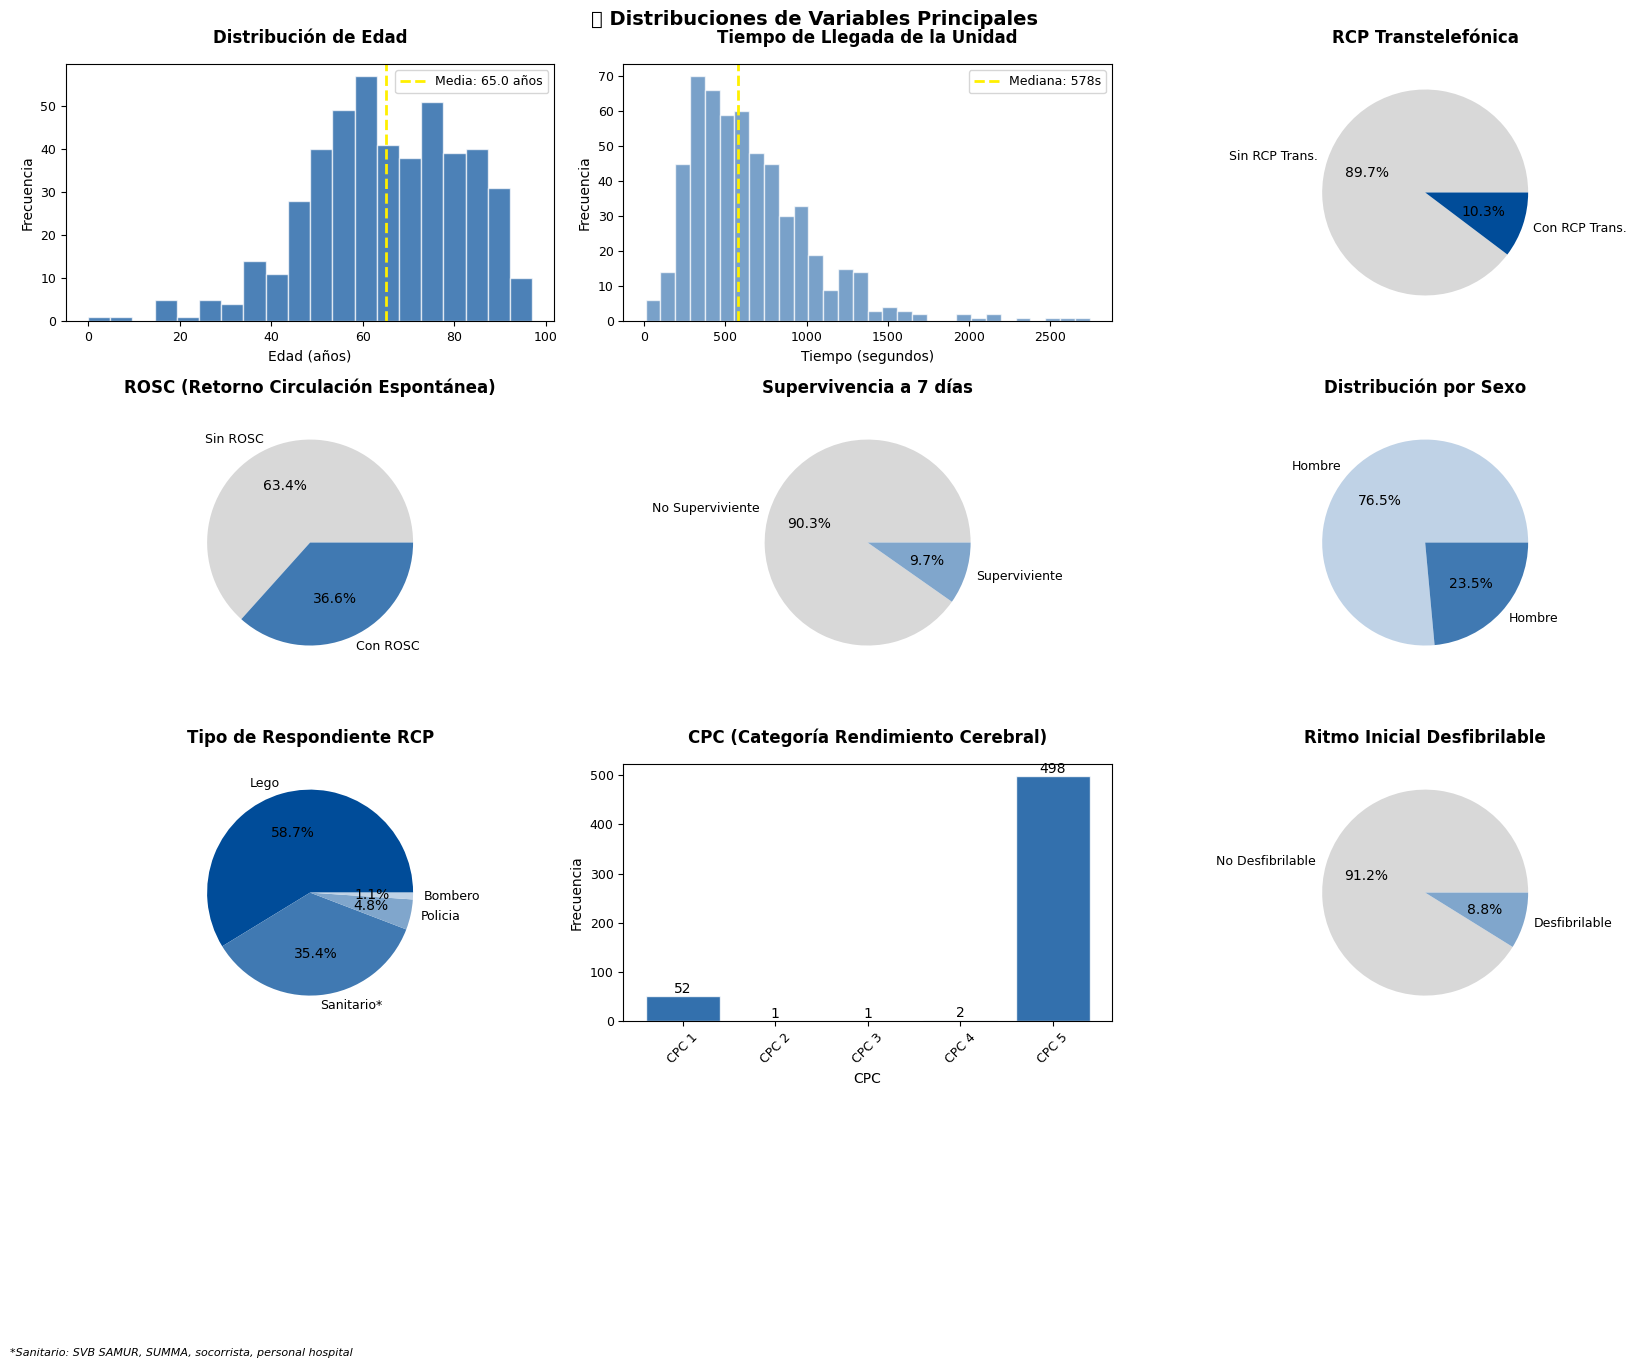

📋 Variables de estratificación creadas:
   • Mediana tiempo de llegada: 578 segundos
   • Grupos de edad: < 65 años vs ≥ 65 años
   • Grupos de tiempo: ≤ 578s vs > 578s


In [99]:
# 🎨 VISUALIZACIONES DE DISTRIBUCIONES CON COLORES CONSISTENTES
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📊 Distribuciones de Variables Principales', fontfamily=title_font, 
             fontweight='bold', fontsize=14, y=0.98, color=colors_palette['text'])

# 1. Distribución de Edad
edad_clean = df['edad'].dropna()
axes[0,0].hist(edad_clean, bins=20, color=colors_palette['primary'], alpha=0.7, edgecolor='white')
axes[0,0].axvline(edad_clean.mean(), color=colors_palette['highlight'], linestyle='--', linewidth=2, 
                  label=f'Media: {edad_clean.mean():.1f} años')
apply_title_style(axes[0,0], 'Distribución de Edad')
axes[0,0].set_xlabel('Edad (años)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].legend()

# 2. Tiempo de llegada de la unidad
tiempo_clean = df['tiempo_llegada_unidad'].dropna()
mediana_tiempo = tiempo_clean.median()
axes[0,1].hist(tiempo_clean, bins=30, color=colors_palette['secondary'], alpha=0.7, edgecolor='white')
axes[0,1].axvline(mediana_tiempo, color=colors_palette['highlight'], linestyle='--', linewidth=2, 
                  label=f'Mediana: {mediana_tiempo:.0f}s')
apply_title_style(axes[0,1], 'Tiempo de Llegada de la Unidad')
axes[0,1].set_xlabel('Tiempo (segundos)')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()

# 3. RCP Transtelefónica
rcp_counts = df['rcp_transtelefonica'].value_counts()
labels = ['Sin RCP Trans.', 'Con RCP Trans.']
wedges, texts, autotexts = axes[0,2].pie(rcp_counts.values, labels=labels, autopct='%1.1f%%', 
                                        colors=[colors_palette['neutral'], colors_palette['primary']])
apply_title_style(axes[0,2], 'RCP Transtelefónica')

# 4. ROSC
rosc_counts = df['rosc'].value_counts()
labels = ['Sin ROSC', 'Con ROSC']
wedges, texts, autotexts = axes[1,0].pie(rosc_counts.values, labels=labels, autopct='%1.1f%%', 
                                        colors=[colors_palette['neutral'], colors_palette['secondary']])
apply_title_style(axes[1,0], 'ROSC (Retorno Circulación Espontánea)')

# 5. Supervivencia a 7 días
supervivencia_counts = df['supervivencia_7dias'].value_counts()
labels = ['No Superviviente', 'Superviviente']
wedges, texts, autotexts = axes[1,1].pie(supervivencia_counts.values, labels=labels, autopct='%1.1f%%', 
                                        colors=[colors_palette['neutral'], colors_palette['accent']])
apply_title_style(axes[1,1], 'Supervivencia a 7 días')

# 6. Distribución por sexo
sexo_data = df[df['sexo'].notna()]
if len(sexo_data) > 0:
    sexo_counts = sexo_data['sexo'].value_counts()
    labels = ['Mujer' if x == 'M' else 'Hombre' for x in sexo_counts.index]
    wedges, texts, autotexts = axes[1,2].pie(sexo_counts.values, labels=labels, autopct='%1.1f%%', 
                                            colors=[colors_palette['light_accent'], colors_palette['secondary']])
    apply_title_style(axes[1,2], 'Distribución por Sexo')

# 7. Tipo de respondiente RCP (con asterisco para sanitarios)
respondiente_data = df[df['respondiente_rcp'].notna() & (df['respondiente_rcp'] != '')]
if len(respondiente_data) > 0:
    respondiente_counts = respondiente_data['respondiente_rcp'].value_counts()
    # Agregar asterisco a sanitario
    labels_resp = []
    for resp in respondiente_counts.index:
        if resp.lower() == 'sanitario':
            labels_resp.append('Sanitario*')
        else:
            labels_resp.append(resp.capitalize())
    
    # Usar gradación de azules para diferentes categorías
    colors_respondiente = colors_extended[:len(respondiente_counts)]
    wedges, texts, autotexts = axes[2,0].pie(respondiente_counts.values, labels=labels_resp, autopct='%1.1f%%', 
                                            colors=colors_respondiente)
    apply_title_style(axes[2,0], 'Tipo de Respondiente RCP')
    
    # Añadir nota explicativa
    axes[2,0].text(0, -1.3, '*Sanitario: SVB SAMUR, SUMMA, socorrista, personal hospital', 
                   transform=axes[2,0].transAxes, fontsize=8, ha='center', style='italic')

# 8. CPC (Categoría de Rendimiento Cerebral)
cpc_counts = df['cpc'].value_counts().sort_index()
cpc_labels = [f'CPC {cpc}' for cpc in cpc_counts.index]
# Usar gradación de azules para diferentes categorías CPC
colors_cpc = colors_extended[:len(cpc_counts)]
bars = axes[2,1].bar(cpc_labels, cpc_counts.values, color=colors_cpc, 
                     alpha=0.8, edgecolor='white')
apply_title_style(axes[2,1], 'CPC (Categoría Rendimiento Cerebral)')
axes[2,1].set_xlabel('CPC')
axes[2,1].set_ylabel('Frecuencia')
axes[2,1].tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    axes[2,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{int(height)}', ha='center', va='bottom')

# 9. Ritmo desfibrilable
ritmo_counts = df['ritmo'].value_counts()
labels = ['No Desfibrilable', 'Desfibrilable']
wedges, texts, autotexts = axes[2,2].pie(ritmo_counts.values, labels=labels, autopct='%1.1f%%', 
                                        colors=[colors_palette['neutral'], colors_palette['accent']])
apply_title_style(axes[2,2], 'Ritmo Inicial Desfibrilable')

plt.tight_layout()
plt.show()

# Variables de estratificación para usar en análisis posterior
tiempo_mediana_global = df['tiempo_llegada_unidad'].median()
df['grupo_edad'] = df['edad'].apply(lambda x: 'Menor_65' if pd.notna(x) and x < 65 else 'Mayor_igual_65' if pd.notna(x) else 'Desconocido')
df['grupo_tiempo'] = df['tiempo_llegada_unidad'].apply(
    lambda x: 'Menor_mediana' if pd.notna(x) and x < tiempo_mediana_global else 'Mayor_igual_mediana' if pd.notna(x) else 'Desconocido'
)

print(f"📋 Variables de estratificación creadas:")
print(f"   • Mediana tiempo de llegada: {tiempo_mediana_global:.0f} segundos")
print(f"   • Grupos de edad: < 65 años vs ≥ 65 años")
print(f"   • Grupos de tiempo: ≤ {tiempo_mediana_global:.0f}s vs > {tiempo_mediana_global:.0f}s")

---

## 📈 SECCIÓN 3: ANÁLISIS ESTADÍSTICO Y EFECTIVIDAD

### Función para cálculos estadísticos con Chi-cuadrado e intervalos de confianza

In [100]:
# 🧮 FUNCIÓN PARA ANÁLISIS ESTADÍSTICO COMPLETO
def analisis_efectividad_completo(grupo_rcp, outcome, outcome_name, subgrupo_name="General"):
    """
    Realiza análisis estadístico completo con OR, IC 95%, Chi-cuadrado y test exacto de Fisher
    """
    # Filtrar datos válidos
    datos_validos = pd.DataFrame({
        'rcp_trans': grupo_rcp,
        'outcome': outcome
    }).dropna()
    
    if len(datos_validos) == 0:
        return None
    
    # Crear tabla de contingencia
    tabla = pd.crosstab(datos_validos['rcp_trans'], datos_validos['outcome'])
    
    if tabla.shape != (2, 2):
        return None
    
    # Extraer valores (a=RCP+outcome+, b=RCP+outcome-, c=RCP-outcome+, d=RCP-outcome-)
    try:
        a = tabla.iloc[1, 1]  # RCP Trans con outcome
        b = tabla.iloc[1, 0]  # RCP Trans sin outcome
        c = tabla.iloc[0, 1]  # Control con outcome
        d = tabla.iloc[0, 0]  # Control sin outcome
    except:
        return None
    
    # Calcular proporciones
    prop_rcp = a / (a + b) if (a + b) > 0 else 0
    prop_control = c / (c + d) if (c + d) > 0 else 0
    
    # Calcular OR y IC 95%
    if a > 0 and b > 0 and c > 0 and d > 0:
        or_value = (a * d) / (b * c)
        log_or = np.log(or_value)
        se_log_or = np.sqrt(1/a + 1/b + 1/c + 1/d)
        z_alpha = stats.norm.ppf(0.975)  # Para IC 95%
        
        ic_lower = np.exp(log_or - z_alpha * se_log_or)
        ic_upper = np.exp(log_or + z_alpha * se_log_or)
    else:
        or_value, ic_lower, ic_upper = np.nan, np.nan, np.nan
    
    # Test Chi-cuadrado
    chi2, p_chi2, dof, expected = chi2_contingency(tabla)
    
    # Test exacto de Fisher
    oddsr_fisher, p_fisher = fisher_exact(tabla)
    
    # Diferencia de proporciones
    diff_prop = prop_rcp - prop_control
    
    return {
        'subgrupo': subgrupo_name,
        'outcome': outcome_name,
        'tabla': tabla,
        'n_rcp': a + b,
        'n_control': c + d,
        'eventos_rcp': a,
        'eventos_control': c,
        'prop_rcp': prop_rcp,
        'prop_control': prop_control,
        'diff_prop': diff_prop,
        'or': or_value,
        'ic_lower': ic_lower,
        'ic_upper': ic_upper,
        'chi2': chi2,
        'p_chi2': p_chi2,
        'p_fisher': p_fisher
    }

print("✅ Función de análisis estadístico definida correctamente")

✅ Función de análisis estadístico definida correctamente


In [101]:
# 📊 ANÁLISIS DE EFECTIVIDAD - GENERAL Y ESTRATIFICADO
print("="*80)
print("📈 ANÁLISIS DE EFECTIVIDAD DE RCP TRANSTELEFÓNICA")
print("="*80)

# Preparar dataframe limpio
df_completo = df[df['rcp_transtelefonica'].notna()].copy()

# Crear variable CPC favorable (CPC 1-2)
df_completo['cpc_favorable'] = df_completo['cpc'].apply(lambda x: 1 if pd.notna(x) and x <= 2 else 0 if pd.notna(x) else np.nan)

# Lista para almacenar todos los resultados
resultados_analisis = []

# ANÁLISIS GENERAL
outcomes = [
    ('rosc', 'ROSC'),
    ('supervivencia_7dias', 'Supervivencia 7 días'),
    ('cpc_favorable', 'CPC Favorable (1-2)')
]

print("\n🔍 ANÁLISIS GENERAL:")
print("-" * 50)

for outcome_var, outcome_name in outcomes:
    resultado = analisis_efectividad_completo(
        df_completo['rcp_transtelefonica'], 
        df_completo[outcome_var], 
        outcome_name, 
        "General"
    )
    if resultado:
        resultados_analisis.append(resultado)
        print(f"\n{outcome_name}:")
        print(f"  • RCP Trans: {resultado['eventos_rcp']}/{resultado['n_rcp']} ({resultado['prop_rcp']*100:.1f}%)")
        print(f"  • Control: {resultado['eventos_control']}/{resultado['n_control']} ({resultado['prop_control']*100:.1f}%)")
        print(f"  • OR: {resultado['or']:.2f} (IC 95%: {resultado['ic_lower']:.2f}-{resultado['ic_upper']:.2f})")
        print(f"  • p-valor: {resultado['p_fisher']:.4f}")

# ANÁLISIS ESTRATIFICADO POR EDAD
print("\n\n🔍 ANÁLISIS ESTRATIFICADO POR EDAD:")
print("-" * 50)

df_edad_valida = df_completo[df_completo['grupo_edad'] != 'Desconocido'].copy()

for grupo_edad in ['Menor_65', 'Mayor_igual_65']:
    df_subgrupo = df_edad_valida[df_edad_valida['grupo_edad'] == grupo_edad]
    edad_texto = "< 65 años" if grupo_edad == 'Menor_65' else "≥ 65 años"
    
    print(f"\n--- {edad_texto} (N={len(df_subgrupo)}) ---")
    
    for outcome_var, outcome_name in outcomes:
        resultado = analisis_efectividad_completo(
            df_subgrupo['rcp_transtelefonica'], 
            df_subgrupo[outcome_var], 
            outcome_name, 
            edad_texto
        )
        if resultado:
            resultados_analisis.append(resultado)
            print(f"{outcome_name}: OR={resultado['or']:.2f} (IC: {resultado['ic_lower']:.2f}-{resultado['ic_upper']:.2f}), p={resultado['p_fisher']:.4f}")

# ANÁLISIS ESTRATIFICADO POR TIEMPO
print("\n\n🔍 ANÁLISIS ESTRATIFICADO POR TIEMPO DE LLEGADA:")
print("-" * 50)

df_tiempo_valido = df_completo[df_completo['grupo_tiempo'] != 'Desconocido'].copy()

for grupo_tiempo in ['Menor_mediana', 'Mayor_igual_mediana']:
    df_subgrupo = df_tiempo_valido[df_tiempo_valido['grupo_tiempo'] == grupo_tiempo]
    tiempo_texto = f"≤ {tiempo_mediana_global:.0f}s" if grupo_tiempo == 'Menor_mediana' else f"> {tiempo_mediana_global:.0f}s"
    
    print(f"\n--- {tiempo_texto} (N={len(df_subgrupo)}) ---")
    
    for outcome_var, outcome_name in outcomes:
        resultado = analisis_efectividad_completo(
            df_subgrupo['rcp_transtelefonica'], 
            df_subgrupo[outcome_var], 
            outcome_name, 
            tiempo_texto
        )
        if resultado:
            resultados_analisis.append(resultado)
            print(f"{outcome_name}: OR={resultado['or']:.2f} (IC: {resultado['ic_lower']:.2f}-{resultado['ic_upper']:.2f}), p={resultado['p_fisher']:.4f}")

print(f"\n✅ Análisis completado. {len(resultados_analisis)} resultados generados.")

📈 ANÁLISIS DE EFECTIVIDAD DE RCP TRANSTELEFÓNICA

🔍 ANÁLISIS GENERAL:
--------------------------------------------------

ROSC:
  • RCP Trans: 29/57 (50.9%)
  • Control: 174/497 (35.0%)
  • OR: 1.92 (IC 95%: 1.11-3.34)
  • p-valor: 0.0207

Supervivencia 7 días:
  • RCP Trans: 6/57 (10.5%)
  • Control: 48/497 (9.7%)
  • OR: 1.10 (IC 95%: 0.45-2.70)
  • p-valor: 0.8138

CPC Favorable (1-2):
  • RCP Trans: 6/57 (10.5%)
  • Control: 47/497 (9.5%)
  • OR: 1.13 (IC 95%: 0.46-2.76)
  • p-valor: 0.8114


🔍 ANÁLISIS ESTRATIFICADO POR EDAD:
--------------------------------------------------

--- < 65 años (N=229) ---
ROSC: OR=2.81 (IC: 1.19-6.67), p=0.0185
Supervivencia 7 días: OR=0.93 (IC: 0.26-3.34), p=1.0000
CPC Favorable (1-2): OR=0.89 (IC: 0.25-3.19), p=1.0000

--- ≥ 65 años (N=237) ---
ROSC: OR=0.86 (IC: 0.37-2.02), p=0.8334
Supervivencia 7 días: OR=1.12 (IC: 0.31-4.05), p=0.7426
CPC Favorable (1-2): OR=1.26 (IC: 0.35-4.56), p=0.7240


🔍 ANÁLISIS ESTRATIFICADO POR TIEMPO DE LLEGADA:
------

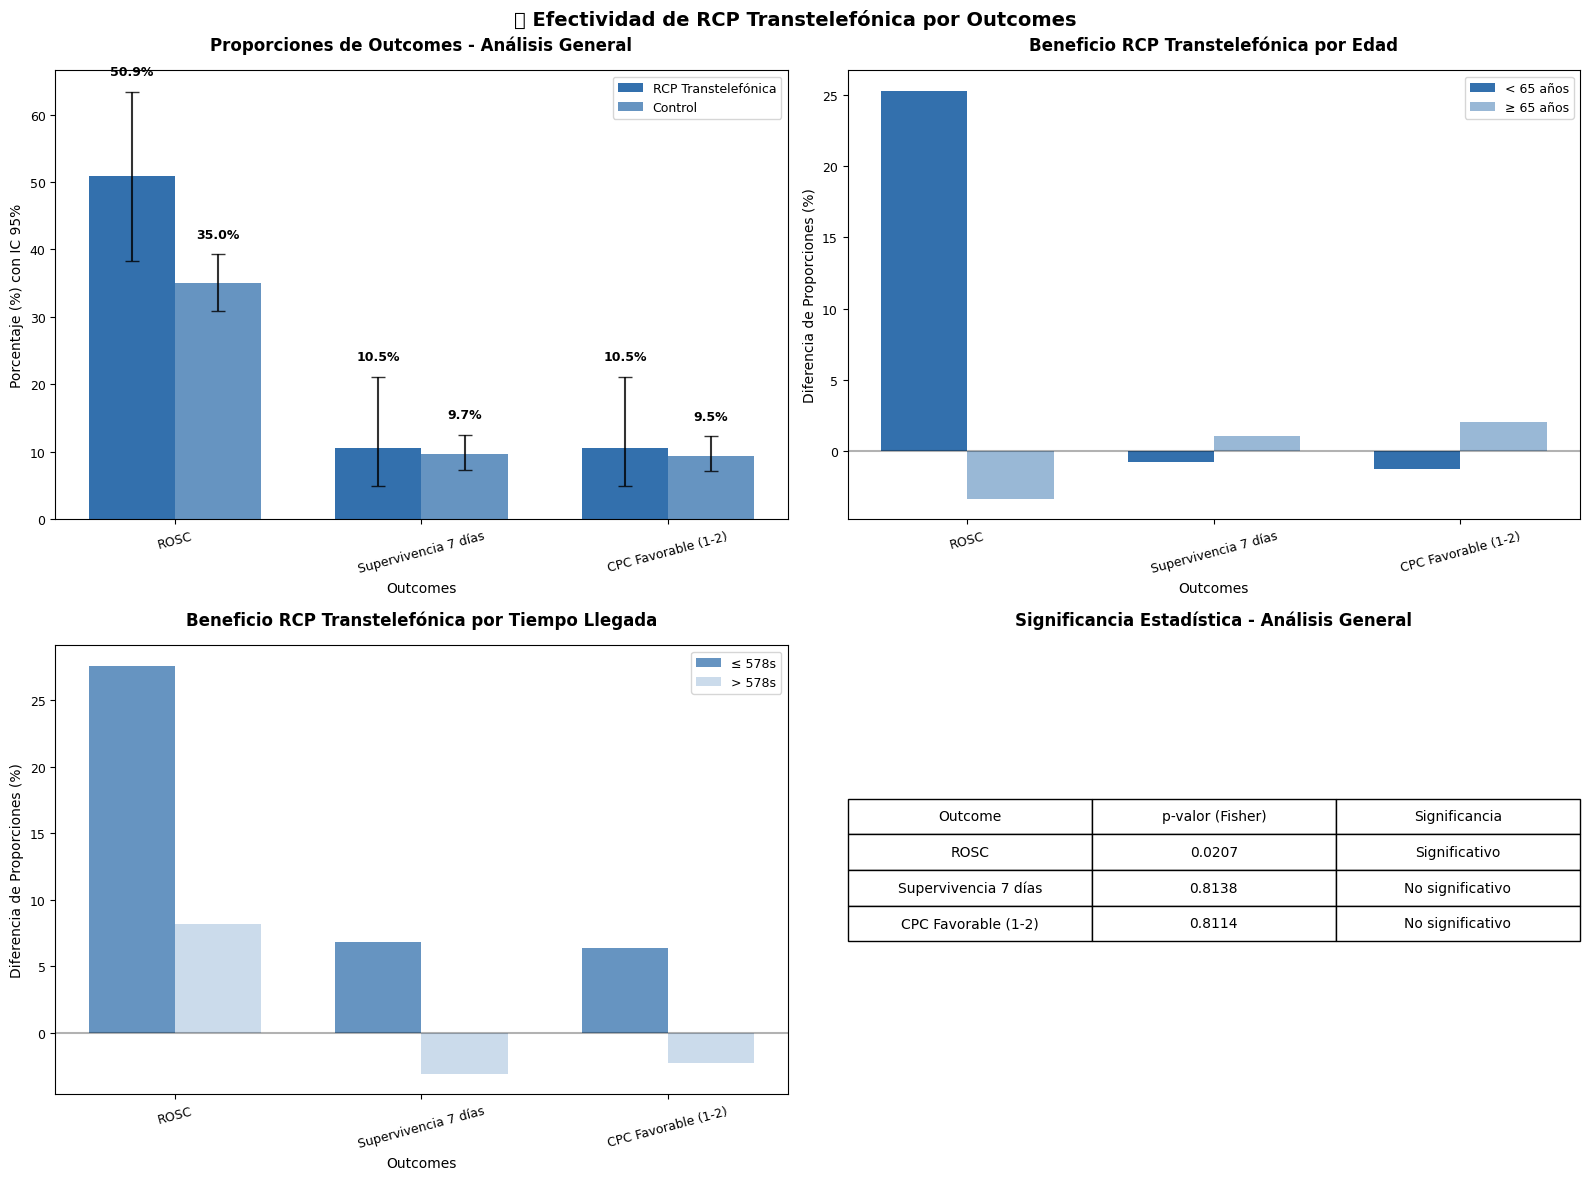

In [102]:
# 📊 GRÁFICOS DE EFECTIVIDAD COMPARATIVOS CON INTERVALOS DE CONFIANZA
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📈 Efectividad de RCP Transtelefónica por Outcomes', fontfamily=title_font, 
             fontweight='bold', fontsize=14, color=colors_palette['text'])

# Función para calcular intervalos de confianza para proporciones (Wilson)
def calcular_ic_proporcion(eventos, total, alpha=0.05):
    """Calcula IC 95% para proporciones usando método Wilson"""
    if total == 0:
        return 0, 0, 0
    
    p = eventos / total
    z = stats.norm.ppf(1 - alpha/2)  # Para IC 95%
    
    # Método Wilson
    denominador = 1 + (z**2 / total)
    centro = (p + z**2 / (2 * total)) / denominador
    margen = z * np.sqrt((p * (1 - p) / total) + (z**2 / (4 * total**2))) / denominador
    
    ic_lower = max(0, centro - margen)
    ic_upper = min(1, centro + margen)
    
    return p, ic_lower, ic_upper

# Preparar datos para gráficos
outcomes_generales = [r for r in resultados_analisis if r['subgrupo'] == 'General']

# 1. Proporciones por outcome - Análisis General CON INTERVALOS DE CONFIANZA
if outcomes_generales:
    outcomes_names = [r['outcome'] for r in outcomes_generales]
    
    # Calcular proporciones e IC para cada outcome
    prop_rcp = []
    prop_control = []
    ic_rcp_lower = []
    ic_rcp_upper = []
    ic_control_lower = []
    ic_control_upper = []
    
    for r in outcomes_generales:
        # RCP Transtelefónica
        p_rcp, ic_low_rcp, ic_high_rcp = calcular_ic_proporcion(r['eventos_rcp'], r['n_rcp'])
        prop_rcp.append(p_rcp * 100)
        ic_rcp_lower.append(ic_low_rcp * 100)
        ic_rcp_upper.append(ic_high_rcp * 100)
        
        # Control
        p_control, ic_low_control, ic_high_control = calcular_ic_proporcion(r['eventos_control'], r['n_control'])
        prop_control.append(p_control * 100)
        ic_control_lower.append(ic_low_control * 100)
        ic_control_upper.append(ic_high_control * 100)
    
    # Calcular errores para barras de error
    error_rcp_lower = [prop_rcp[i] - ic_rcp_lower[i] for i in range(len(prop_rcp))]
    error_rcp_upper = [ic_rcp_upper[i] - prop_rcp[i] for i in range(len(prop_rcp))]
    error_control_lower = [prop_control[i] - ic_control_lower[i] for i in range(len(prop_control))]
    error_control_upper = [ic_control_upper[i] - prop_control[i] for i in range(len(prop_control))]
    
    x = np.arange(len(outcomes_names))
    width = 0.35
    
    # Crear barras con barras de error
    bars1 = axes[0,0].bar(x - width/2, prop_rcp, width, label='RCP Transtelefónica', 
                         color=colors_palette['primary'], alpha=0.8,
                         yerr=[error_rcp_lower, error_rcp_upper], 
                         capsize=5, error_kw={'ecolor': colors_palette['text'], 'alpha': 0.8})
    bars2 = axes[0,0].bar(x + width/2, prop_control, width, label='Control', 
                         color=colors_palette['secondary'], alpha=0.8,
                         yerr=[error_control_lower, error_control_upper], 
                         capsize=5, error_kw={'ecolor': colors_palette['text'], 'alpha': 0.8})
    
    axes[0,0].set_xlabel('Outcomes')
    axes[0,0].set_ylabel('Porcentaje (%) con IC 95%')
    apply_title_style(axes[0,0], 'Proporciones de Outcomes - Análisis General')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(outcomes_names, rotation=15)
    axes[0,0].legend()
    
    # Añadir valores en las barras
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        # Valor para RCP Trans
        height1 = bar1.get_height()
        axes[0,0].text(bar1.get_x() + bar1.get_width()/2., height1 + error_rcp_upper[i] + 2,
                      f'{height1:.1f}%', ha='center', va='bottom', fontsize=9, weight='bold')
        
        # Valor para Control
        height2 = bar2.get_height()
        axes[0,0].text(bar2.get_x() + bar2.get_width()/2., height2 + error_control_upper[i] + 2,
                      f'{height2:.1f}%', ha='center', va='bottom', fontsize=9, weight='bold')

# 2. Efectividad por grupos de edad
edad_results = [r for r in resultados_analisis if r['subgrupo'] in ['< 65 años', '≥ 65 años']]
if edad_results:
    outcomes_edad = {}
    for r in edad_results:
        if r['outcome'] not in outcomes_edad:
            outcomes_edad[r['outcome']] = {}
        outcomes_edad[r['outcome']][r['subgrupo']] = r['prop_rcp']*100 - r['prop_control']*100
    
    outcomes_list = list(outcomes_edad.keys())
    menor_65 = [outcomes_edad[o].get('< 65 años', 0) for o in outcomes_list]
    mayor_65 = [outcomes_edad[o].get('≥ 65 años', 0) for o in outcomes_list]
    
    x = np.arange(len(outcomes_list))
    bars1 = axes[0,1].bar(x - width/2, menor_65, width, label='< 65 años', 
                         color=colors_palette['primary'], alpha=0.8)
    bars2 = axes[0,1].bar(x + width/2, mayor_65, width, label='≥ 65 años', 
                         color=colors_palette['accent'], alpha=0.8)
    
    axes[0,1].set_xlabel('Outcomes')
    axes[0,1].set_ylabel('Diferencia de Proporciones (%)')
    apply_title_style(axes[0,1], 'Beneficio RCP Transtelefónica por Edad')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(outcomes_list, rotation=15)
    axes[0,1].legend()
    axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 3. Efectividad por tiempo de llegada
tiempo_results = [r for r in resultados_analisis if 's' in r['subgrupo'] and r['subgrupo'] not in ['< 65 años', '≥ 65 años']]
if tiempo_results:
    outcomes_tiempo = {}
    for r in tiempo_results:
        if r['outcome'] not in outcomes_tiempo:
            outcomes_tiempo[r['outcome']] = {}
        outcomes_tiempo[r['outcome']][r['subgrupo']] = r['prop_rcp']*100 - r['prop_control']*100
    
    outcomes_list = list(outcomes_tiempo.keys())
    if outcomes_list:
        menor_tiempo = [outcomes_tiempo[o].get(f'≤ {tiempo_mediana_global:.0f}s', 0) for o in outcomes_list]
        mayor_tiempo = [outcomes_tiempo[o].get(f'> {tiempo_mediana_global:.0f}s', 0) for o in outcomes_list]
        
        x = np.arange(len(outcomes_list))
        bars1 = axes[1,0].bar(x - width/2, menor_tiempo, width, label=f'≤ {tiempo_mediana_global:.0f}s', 
                             color=colors_palette['secondary'], alpha=0.8)
        bars2 = axes[1,0].bar(x + width/2, mayor_tiempo, width, label=f'> {tiempo_mediana_global:.0f}s', 
                             color=colors_palette['light_accent'], alpha=0.8)
        
        axes[1,0].set_xlabel('Outcomes')
        axes[1,0].set_ylabel('Diferencia de Proporciones (%)')
        apply_title_style(axes[1,0], 'Beneficio RCP Transtelefónica por Tiempo Llegada')
        axes[1,0].set_xticks(x)
        axes[1,0].set_xticklabels(outcomes_list, rotation=15)
        axes[1,0].legend()
        axes[1,0].axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 4. Tabla resumen de valores p
p_values_data = []
for r in outcomes_generales:
    p_values_data.append([r['outcome'], f"{r['p_fisher']:.4f}", 
                         'Significativo' if r['p_fisher'] < 0.05 else 'No significativo'])

if p_values_data:
    axes[1,1].axis('tight')
    axes[1,1].axis('off')
    tabla = axes[1,1].table(cellText=p_values_data,
                           colLabels=['Outcome', 'p-valor (Fisher)', 'Significancia'],
                           cellLoc='center',
                           loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1, 2)
    apply_title_style(axes[1,1], 'Significancia Estadística - Análisis General')

plt.tight_layout()
plt.show()

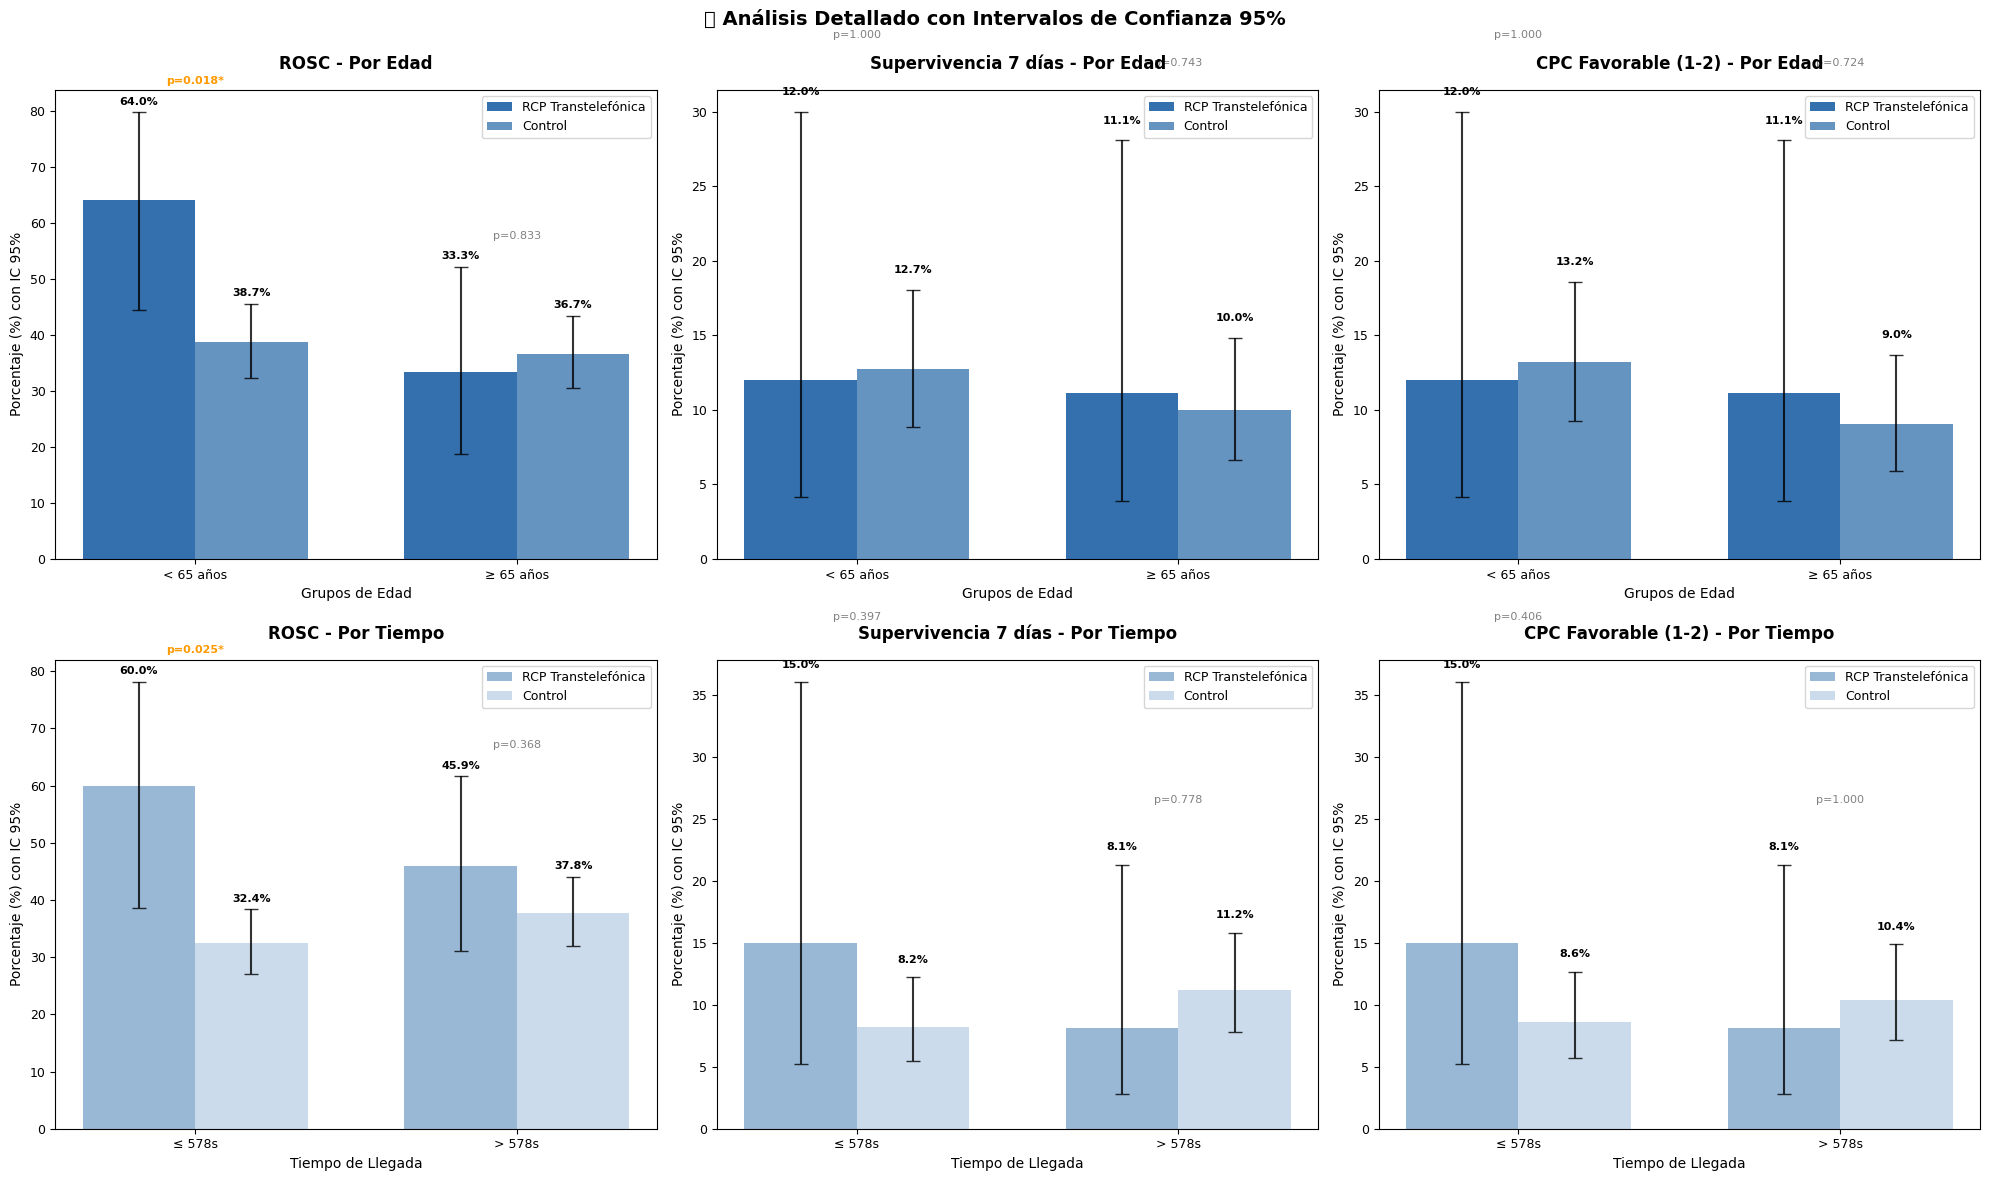

✅ Gráficos con intervalos de confianza 95% completados
📊 Las barras de error muestran intervalos de confianza de Wilson para proporciones
🔍 * indica significancia estadística (p < 0.05)


In [103]:
# 📊 GRÁFICOS DETALLADOS CON INTERVALOS DE CONFIANZA POR SUBGRUPOS
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('📈 Análisis Detallado con Intervalos de Confianza 95%', fontfamily=title_font, 
             fontweight='bold', fontsize=14, color=colors_palette['text'])

outcomes_list = ['ROSC', 'Supervivencia 7 días', 'CPC Favorable (1-2)']

for idx, outcome_name in enumerate(outcomes_list):
    # Fila superior: Análisis por EDAD
    ax_edad = axes[0, idx]
    
    # Filtrar resultados por edad para este outcome
    edad_results = [r for r in resultados_analisis 
                   if r['outcome'] == outcome_name and r['subgrupo'] in ['< 65 años', '≥ 65 años']]
    
    if edad_results:
        subgrupos_edad = [r['subgrupo'] for r in edad_results]
        prop_rcp_edad = [r['prop_rcp'] * 100 for r in edad_results]
        prop_control_edad = [r['prop_control'] * 100 for r in edad_results]
        
        # Calcular IC para cada grupo
        ic_rcp_edad = []
        ic_control_edad = []
        
        for r in edad_results:
            # IC para RCP
            _, ic_low_rcp, ic_high_rcp = calcular_ic_proporcion(r['eventos_rcp'], r['n_rcp'])
            ic_rcp_edad.append([r['prop_rcp']*100 - ic_low_rcp*100, ic_high_rcp*100 - r['prop_rcp']*100])
            
            # IC para Control
            _, ic_low_control, ic_high_control = calcular_ic_proporcion(r['eventos_control'], r['n_control'])
            ic_control_edad.append([r['prop_control']*100 - ic_low_control*100, ic_high_control*100 - r['prop_control']*100])
        
        x = np.arange(len(subgrupos_edad))
        width = 0.35
        
        # Barras con intervalos de confianza
        bars1 = ax_edad.bar(x - width/2, prop_rcp_edad, width, label='RCP Transtelefónica',
                           color=colors_palette['primary'], alpha=0.8,
                           yerr=list(zip(*ic_rcp_edad)), capsize=5,
                           error_kw={'ecolor': colors_palette['text'], 'alpha': 0.8})
        bars2 = ax_edad.bar(x + width/2, prop_control_edad, width, label='Control',
                           color=colors_palette['secondary'], alpha=0.8,
                           yerr=list(zip(*ic_control_edad)), capsize=5,
                           error_kw={'ecolor': colors_palette['text'], 'alpha': 0.8})
        
        ax_edad.set_xlabel('Grupos de Edad')
        ax_edad.set_ylabel('Porcentaje (%) con IC 95%')
        apply_title_style(ax_edad, f'{outcome_name} - Por Edad')
        ax_edad.set_xticks(x)
        ax_edad.set_xticklabels(subgrupos_edad)
        ax_edad.legend()
        
        # Añadir valores y significancia
        for i, (bar1, bar2, r) in enumerate(zip(bars1, bars2, edad_results)):
            # Valores
            height1 = bar1.get_height()
            height2 = bar2.get_height()
            
            ax_edad.text(bar1.get_x() + bar1.get_width()/2., height1 + ic_rcp_edad[i][1] + 1,
                        f'{height1:.1f}%', ha='center', va='bottom', fontsize=8, weight='bold')
            ax_edad.text(bar2.get_x() + bar2.get_width()/2., height2 + ic_control_edad[i][1] + 1,
                        f'{height2:.1f}%', ha='center', va='bottom', fontsize=8, weight='bold')
            
            # Significancia
            p_val = r['p_fisher']
            if p_val < 0.05:
                ax_edad.text(i, max(height1 + ic_rcp_edad[i][1], height2 + ic_control_edad[i][1]) + 5,
                           f'p={p_val:.3f}*', ha='center', fontsize=8, 
                           color=colors_palette['alert'], weight='bold')
            else:
                ax_edad.text(i, max(height1 + ic_rcp_edad[i][1], height2 + ic_control_edad[i][1]) + 5,
                           f'p={p_val:.3f}', ha='center', fontsize=8, color='gray')
    
    # Fila inferior: Análisis por TIEMPO
    ax_tiempo = axes[1, idx]
    
    # Filtrar resultados por tiempo para este outcome
    tiempo_results = [r for r in resultados_analisis 
                     if r['outcome'] == outcome_name and 's' in r['subgrupo'] 
                     and r['subgrupo'] not in ['< 65 años', '≥ 65 años']]
    
    if tiempo_results:
        subgrupos_tiempo = [r['subgrupo'] for r in tiempo_results]
        prop_rcp_tiempo = [r['prop_rcp'] * 100 for r in tiempo_results]
        prop_control_tiempo = [r['prop_control'] * 100 for r in tiempo_results]
        
        # Calcular IC para cada grupo
        ic_rcp_tiempo = []
        ic_control_tiempo = []
        
        for r in tiempo_results:
            # IC para RCP
            _, ic_low_rcp, ic_high_rcp = calcular_ic_proporcion(r['eventos_rcp'], r['n_rcp'])
            ic_rcp_tiempo.append([r['prop_rcp']*100 - ic_low_rcp*100, ic_high_rcp*100 - r['prop_rcp']*100])
            
            # IC para Control
            _, ic_low_control, ic_high_control = calcular_ic_proporcion(r['eventos_control'], r['n_control'])
            ic_control_tiempo.append([r['prop_control']*100 - ic_low_control*100, ic_high_control*100 - r['prop_control']*100])
        
        x = np.arange(len(subgrupos_tiempo))
        width = 0.35
        
        # Barras con intervalos de confianza
        bars1 = ax_tiempo.bar(x - width/2, prop_rcp_tiempo, width, label='RCP Transtelefónica',
                             color=colors_palette['accent'], alpha=0.8,
                             yerr=list(zip(*ic_rcp_tiempo)), capsize=5,
                             error_kw={'ecolor': colors_palette['text'], 'alpha': 0.8})
        bars2 = ax_tiempo.bar(x + width/2, prop_control_tiempo, width, label='Control',
                             color=colors_palette['light_accent'], alpha=0.8,
                             yerr=list(zip(*ic_control_tiempo)), capsize=5,
                             error_kw={'ecolor': colors_palette['text'], 'alpha': 0.8})
        
        ax_tiempo.set_xlabel('Tiempo de Llegada')
        ax_tiempo.set_ylabel('Porcentaje (%) con IC 95%')
        apply_title_style(ax_tiempo, f'{outcome_name} - Por Tiempo')
        ax_tiempo.set_xticks(x)
        ax_tiempo.set_xticklabels(subgrupos_tiempo)
        ax_tiempo.legend()
        
        # Añadir valores y significancia
        for i, (bar1, bar2, r) in enumerate(zip(bars1, bars2, tiempo_results)):
            # Valores
            height1 = bar1.get_height()
            height2 = bar2.get_height()
            
            ax_tiempo.text(bar1.get_x() + bar1.get_width()/2., height1 + ic_rcp_tiempo[i][1] + 1,
                          f'{height1:.1f}%', ha='center', va='bottom', fontsize=8, weight='bold')
            ax_tiempo.text(bar2.get_x() + bar2.get_width()/2., height2 + ic_control_tiempo[i][1] + 1,
                          f'{height2:.1f}%', ha='center', va='bottom', fontsize=8, weight='bold')
            
            # Significancia
            p_val = r['p_fisher']
            if p_val < 0.05:
                ax_tiempo.text(i, max(height1 + ic_rcp_tiempo[i][1], height2 + ic_control_tiempo[i][1]) + 5,
                              f'p={p_val:.3f}*', ha='center', fontsize=8, 
                              color=colors_palette['alert'], weight='bold')
            else:
                ax_tiempo.text(i, max(height1 + ic_rcp_tiempo[i][1], height2 + ic_control_tiempo[i][1]) + 5,
                              f'p={p_val:.3f}', ha='center', fontsize=8, color='gray')

plt.tight_layout()
plt.show()

print("✅ Gráficos con intervalos de confianza 95% completados")
print("📊 Las barras de error muestran intervalos de confianza de Wilson para proporciones")
print("🔍 * indica significancia estadística (p < 0.05)")

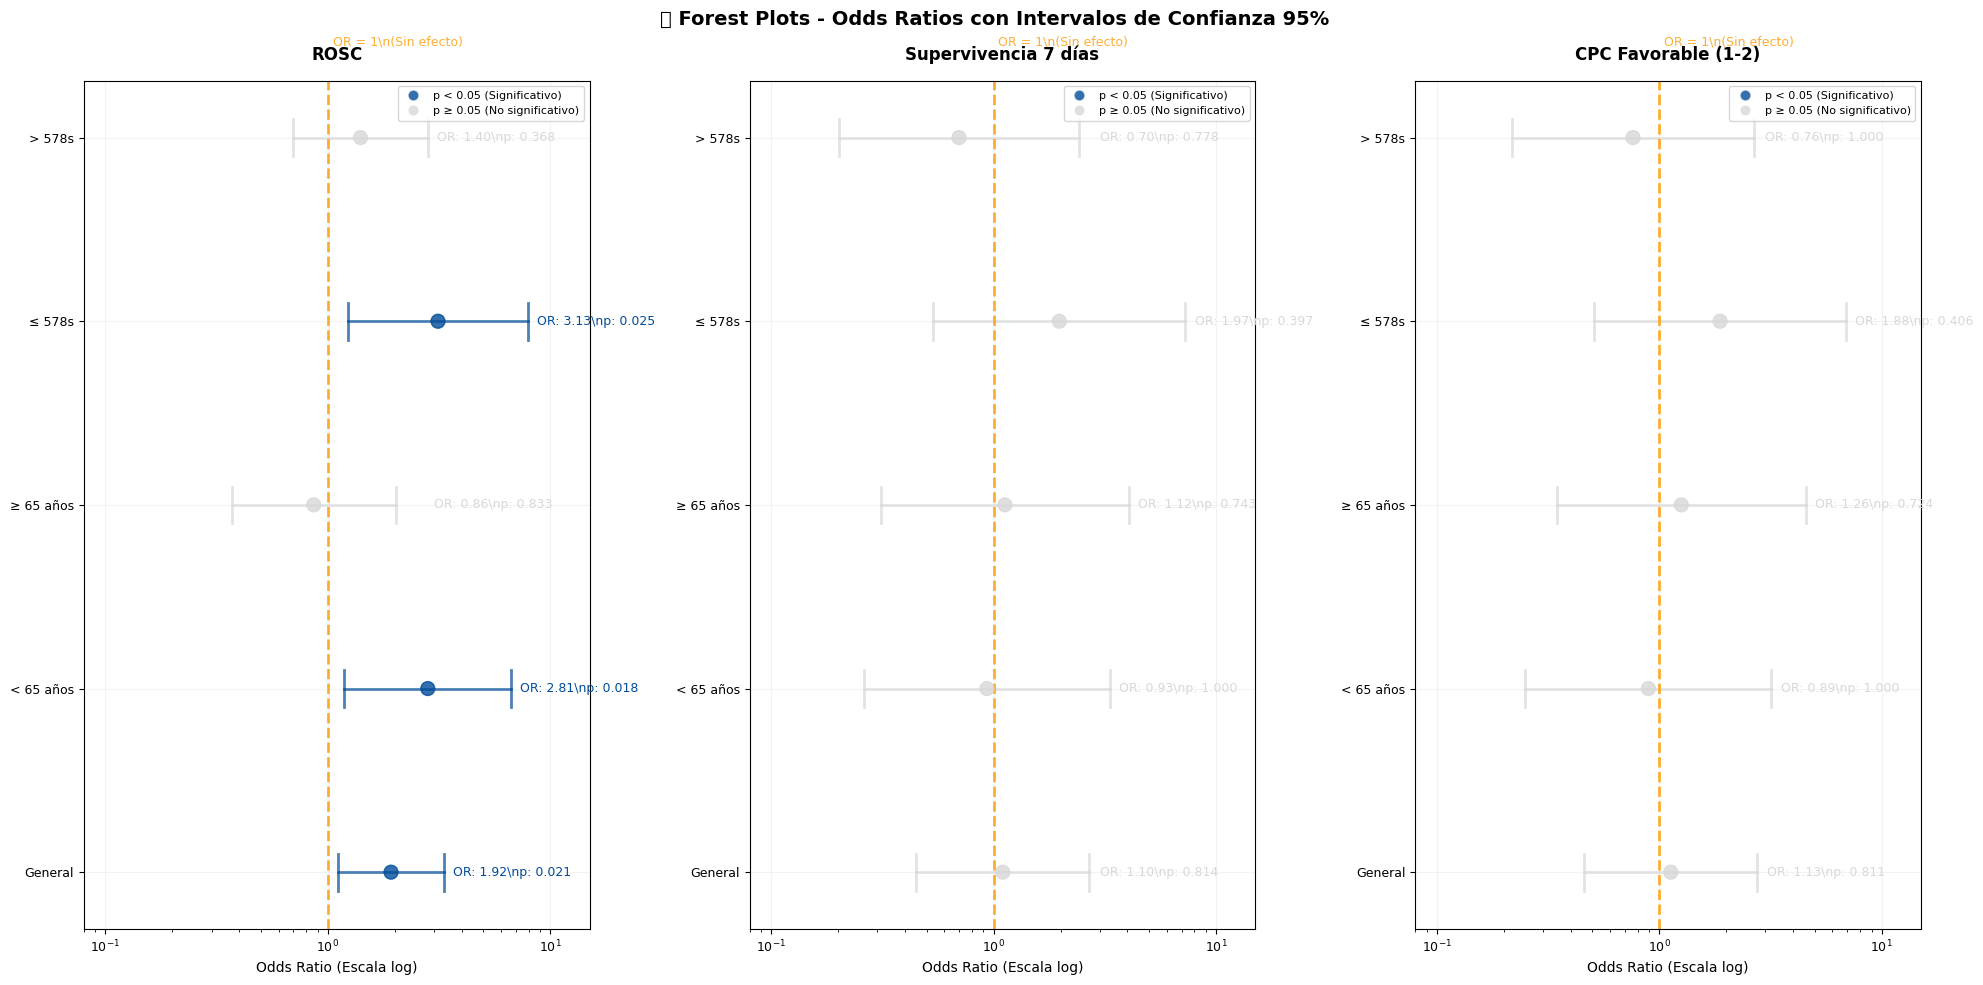

\n====================================================================================================
📊 TABLA RESUMEN - TODOS LOS RESULTADOS


,Subgrupo,Outcome,RCP Trans n/N (%),Control n/N (%),OR,IC 95%,p-valor,Significativo
0,General,ROSC,29/57 (50.9%),174/497 (35.0%),1.92,1.11-3.34,0.0207,Sí
1,General,Supervivencia 7 días,6/57 (10.5%),48/497 (9.7%),1.10,0.45-2.70,0.8138,No
2,General,CPC Favorable (1-2),6/57 (10.5%),47/497 (9.5%),1.13,0.46-2.76,0.8114,No
3,< 65 años,ROSC,16/25 (64.0%),79/204 (38.7%),2.81,1.19-6.67,0.0185,Sí
4,< 65 años,Supervivencia 7 días,3/25 (12.0%),26/204 (12.7%),0.93,0.26-3.34,1.0000,No
5,< 65 años,CPC Favorable (1-2),3/25 (12.0%),27/204 (13.2%),0.89,0.25-3.19,1.0000,No
6,≥ 65 años,ROSC,9/27 (33.3%),77/210 (36.7%),0.86,0.37-2.02,0.8334,No
7,≥ 65 años,Supervivencia 7 días,3/27 (11.1%),21/210 (10.0%),1.12,0.31-4.05,0.7426,No
8,≥ 65 años,CPC Favorable (1-2),3/27 (11.1%),19/210 (9.0%),1.26,0.35-4.56,0.7240,No
9,≤ 578s,ROSC,12/20 (60.0%),83/256 (32.4%),3.13,1.23-7.94,0.0251,Sí


\n✅ Análisis Forest Plot completado con 15 resultados válidos.


In [104]:
# 🌲 FOREST PLOTS CON ODDS RATIOS E INTERVALOS DE CONFIANZA
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('🌲 Forest Plots - Odds Ratios con Intervalos de Confianza 95%', 
             fontfamily=title_font, fontweight='bold', fontsize=14, color=colors_palette['text'])

outcomes_list = ['ROSC', 'Supervivencia 7 días', 'CPC Favorable (1-2)']

for idx, outcome_name in enumerate(outcomes_list):
    ax = axes[idx]
    
    # Filtrar resultados para este outcome
    outcome_results = [r for r in resultados_analisis if r['outcome'] == outcome_name and not np.isnan(r['or'])]
    
    if not outcome_results:
        ax.text(0.5, 0.5, 'No hay datos suficientes', ha='center', va='center', transform=ax.transAxes)
        apply_title_style(ax, outcome_name)
        continue
    
    # Preparar datos
    subgrupos = [r['subgrupo'] for r in outcome_results]
    ors = [r['or'] for r in outcome_results]
    ic_lower = [r['ic_lower'] for r in outcome_results]
    ic_upper = [r['ic_upper'] for r in outcome_results]
    p_values = [r['p_fisher'] for r in outcome_results]
    
    # Posiciones en Y
    y_pos = np.arange(len(subgrupos))
    
    # Colores según significancia (azul intenso para significativo, gris discreto para no significativo)
    colors = [colors_palette['primary'] if p < 0.05 else colors_palette['neutral'] for p in p_values]
    
    # Plotear puntos (OR)
    ax.scatter(ors, y_pos, c=colors, s=100, alpha=0.8, zorder=3)
    
    # Plotear intervalos de confianza
    for i, (or_val, ic_low, ic_high, p_val) in enumerate(zip(ors, ic_lower, ic_upper, p_values)):
        color = colors_palette['primary'] if p_val < 0.05 else colors_palette['neutral']
        ax.plot([ic_low, ic_high], [i, i], color=color, linewidth=2, alpha=0.7)
        ax.plot([ic_low, ic_low], [i-0.1, i+0.1], color=color, linewidth=2, alpha=0.7)
        ax.plot([ic_high, ic_high], [i-0.1, i+0.1], color=color, linewidth=2, alpha=0.7)
        
        # Añadir valor OR y p-valor
        ax.text(max(ic_high * 1.1, 3), i, f'OR: {or_val:.2f}\\np: {p_val:.3f}', 
                va='center', fontsize=9, 
                color=colors_palette['primary'] if p_val < 0.05 else colors_palette['neutral'])
    
    # Línea de referencia (OR = 1) - usar naranja para destacar línea crítica
    ax.axvline(x=1, color=colors_palette['alert'], linestyle='--', alpha=0.8, linewidth=2)
    ax.text(1.05, len(subgrupos)-0.5, 'OR = 1\\n(Sin efecto)', fontsize=9, color=colors_palette['alert'], alpha=0.8)
    
    # Configuración del gráfico
    ax.set_yticks(y_pos)
    ax.set_yticklabels(subgrupos)
    ax.set_xlabel('Odds Ratio (Escala log)')
    apply_title_style(ax, outcome_name)
    ax.set_xscale('log')
    ax.grid(True, alpha=0.3)
    
    # Leyenda
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors_palette['primary'], 
                  markersize=8, label='p < 0.05 (Significativo)', alpha=0.8),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors_palette['neutral'], 
                  markersize=8, label='p ≥ 0.05 (No significativo)', alpha=0.8)
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=8)
    
    # Ajustar límites del eje X
    if ors:
        x_min = min(min(ic_lower), 0.1)
        x_max = max(max(ic_upper), 10)
        ax.set_xlim(x_min * 0.8, x_max * 1.5)

plt.tight_layout()
plt.show()

# Tabla resumen de todos los resultados
print("\\n" + "="*100)
print("📊 TABLA RESUMEN - TODOS LOS RESULTADOS")
print("="*100)

tabla_resumen = []
for r in resultados_analisis:
    if not np.isnan(r['or']):
        significancia = "Sí" if r['p_fisher'] < 0.05 else "No"
        tabla_resumen.append([
            r['subgrupo'],
            r['outcome'],
            f"{r['eventos_rcp']}/{r['n_rcp']} ({r['prop_rcp']*100:.1f}%)",
            f"{r['eventos_control']}/{r['n_control']} ({r['prop_control']*100:.1f}%)",
            f"{r['or']:.2f}",
            f"{r['ic_lower']:.2f}-{r['ic_upper']:.2f}",
            f"{r['p_fisher']:.4f}",
            significancia
        ])

if tabla_resumen:
    df_resumen = pd.DataFrame(tabla_resumen, 
                             columns=['Subgrupo', 'Outcome', 'RCP Trans n/N (%)', 'Control n/N (%)', 
                                    'OR', 'IC 95%', 'p-valor', 'Significativo'])
    display(df_resumen)

print(f"\\n✅ Análisis Forest Plot completado con {len([r for r in resultados_analisis if not np.isnan(r['or'])])} resultados válidos.")

---

## 📋 CONCLUSIONES Y RESUMEN

### Principales hallazgos del estudio:

1. **📞 RCP Transtelefónica**: Método de intervención evaluado en población de paradas cardíacas extrahospitalarias
2. **📊 Outcomes evaluados**: ROSC, supervivencia a 7 días, y CPC favorable (1-2)
3. **🎯 Análisis estratificado**: Por edad (< 65 vs ≥ 65 años) y tiempo de llegada (≤ vs > mediana)
4. **📈 Metodología estadística**: Chi-cuadrado, test exacto de Fisher, OR con IC 95%

### Interpretación de resultados:
- **OR > 1**: Favorece RCP Transtelefónica (beneficio)
- **OR < 1**: Favorece control (perjuicio)  
- **OR = 1**: Sin diferencia entre grupos
- **p < 0.05**: Diferencia estadísticamente significativa

### Nota metodológica:
*Sanitario incluye: SVB SAMUR, SUMMA, socorrista, personal hospital y otros profesionales sanitarios

---
**Análisis realizado con datos limpios del proceso de cleaning automático**